In [1]:
%matplotlib inline
import pickle as pk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
from dateutil import parser

In [2]:
tokyo_local_nll = pk.load(open('./results_tokyo/evaluation_local_nll.pk', 'rb'))
tokyo_global_nll = pk.load(open('./results_tokyo/evaluation_global_nll.pk', 'rb'))
osaka_local_nll = pk.load(open('./results_osaka/evaluation_local_nll.pk', 'rb'))
osaka_global_nll = pk.load(open('./results_osaka/evaluation_global_nll.pk', 'rb'))

In [4]:
T = 96

In [5]:
def get_time_average_loss(metric_dict):
    
    metric_dict_t = dict({})
    for t in range(T):
        metric_dict_t[t] = []
    
    for dt in metric_dict:
        if len(dt) == 4:
            metric_dict_t[dt[3]].append(metric_dict[dt])
            
    for t in range(T):
        metric_dict_t[t] = np.mean(metric_dict_t[t])
        
    return metric_dict_t

In [28]:
def get_weekday_average_loss(metric_dict):
    
    metric_dict_d = dict({})
    
    for dt in metric_dict:
        if len(dt) == 3:
            wd = parser.parse('{:04d}-{:02d}-{:02d}'.format(dt[0], dt[1], dt[2])).strftime("%a")
            if wd not in metric_dict_d:
                metric_dict_d[wd] = []
            metric_dict_d[wd].append(metric_dict[dt])
            
    for d in metric_dict_d:
        metric_dict_d[d] = np.mean(metric_dict_d[d])
        
    return metric_dict_d

In [9]:
tokyo_local_nll_t = get_time_average_loss(tokyo_local_nll)
tokyo_global_nll_t = get_time_average_loss(tokyo_global_nll)
osaka_local_nll_t = get_time_average_loss(osaka_local_nll)
osaka_global_nll_t = get_time_average_loss(osaka_global_nll)

/home/fan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/fan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
df = pd.DataFrame([pd.Series(tokyo_local_nll_t), pd.Series(tokyo_global_nll_t), pd.Series(osaka_local_nll_t), pd.Series(osaka_global_nll_t)]).T

In [13]:
df.columns = ['Ours_Tokyo', 'GRU_Tokyo', 'Ours_Osaka', 'GRU_Osaka']

Text(0, 0.5, 'Cross Entropy')

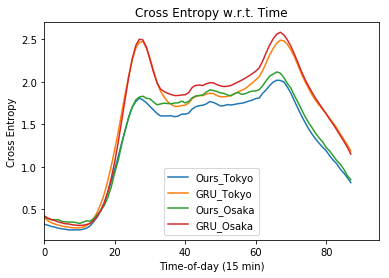

In [15]:
df.plot(title='Cross Entropy w.r.t. Time')
plt.xlabel('Time-of-day (15 min)')
plt.ylabel('Cross Entropy')

In [29]:
tokyo_local_nll_d = get_weekday_average_loss(tokyo_local_nll)
tokyo_global_nll_d = get_weekday_average_loss(tokyo_global_nll)
osaka_local_nll_d = get_weekday_average_loss(osaka_local_nll)
osaka_global_nll_d = get_weekday_average_loss(osaka_global_nll)

In [30]:
df = pd.DataFrame([pd.Series(tokyo_local_nll_d), pd.Series(tokyo_global_nll_d), pd.Series(osaka_local_nll_d), pd.Series(osaka_global_nll_d)]).T

In [31]:
df.columns = ['Ours_Tokyo', 'GRU_Tokyo', 'Ours_Osaka', 'GRU_Osaka']

Text(0, 0.5, 'Cross Entropy')

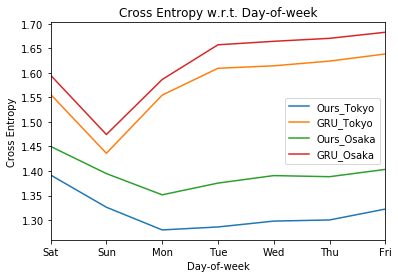

In [32]:
df.plot(title='Cross Entropy w.r.t. Day-of-week')
plt.xlabel('Day-of-week')
plt.ylabel('Cross Entropy')